In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/YBIGTA/교육세션/20220726/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/YBIGTA/교육세션/20220726/movies_test.csv')

# 데이터 전처리

In [4]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [5]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [6]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [7]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [8]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [9]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [10]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [34]:
model=RandomForestRegressor(n_estimators=15, bootstrap=True, criterion='mse', max_depth=100, max_leaf_nodes=100, min_samples_split=2, min_samples_leaf=1, max_features='auto')
model.fit(train_x,train_y)

print(model.score(train_x, train_y))

0.8889974516676522


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [35]:
pred = model.predict(test)

# 제출

In [36]:
submission = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/YBIGTA/교육세션/20220726/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [37]:
submission['box_off_num'] = pred

In [38]:
submission

,title,box_off_num
0,용서는 없다,4.024554e+06
1,아빠가 여자를 좋아해,1.347893e+06
2,하모니,1.297712e+06
3,의형제,1.445314e+06
4,평행 이론,6.200226e+05
...,...,...
238,해에게서 소년에게,3.291882e+05
239,울보 권투부,1.282644e+04
240,어떤살인,1.914990e+05
241,말하지 못한 비밀,1.279862e+04


In [43]:
submission.to_csv('/content/drive/MyDrive/ColabNotebooks/YBIGTA/교육세션/20220726/베이스라인.csv',index = False)

# 제출 점수(과제부분)

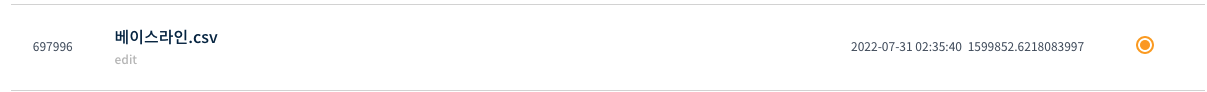